In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

data = pd.read_csv('train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].transpose()
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255

data_train = data[1000:m].transpose()
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255
_, m_train = X_train.shape

def init_params():
    '''
    Initializing parameters
    '''
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2  = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z): return np.maximum(0, Z)

def softmax(Z): return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
    '''
    Forward propagation method
    '''
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def deriv_relu(Z):
    '''
    Derivative of the ReLU function
    '''
    return Z > 0

def one_hot(Y):
    '''
    Turns expected result into a matrix
    '''
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.transpose()
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    '''
    Backward propagation method
    '''
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_relu(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    '''
    Paramaters update function
    '''
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)
    
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 500 == 0:
            print("Iteration: ", i)
            print("Accuracy: ",  get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 2000, 0.10)

Iteration:  0
[7 3 7 ... 7 4 4] [6 5 8 ... 5 0 0]
Accuracy:  0.1136829268292683
Iteration:  500
[6 5 8 ... 5 0 0] [6 5 8 ... 5 0 0]
Accuracy:  0.8575609756097561
Iteration:  1000
[6 5 8 ... 5 0 0] [6 5 8 ... 5 0 0]
Accuracy:  0.8826585365853659
Iteration:  1500
[6 5 8 ... 5 0 0] [6 5 8 ... 5 0 0]
Accuracy:  0.8934634146341464


In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation = 'nearest')
    plt.show()

(784, 41000)
Prediction:  [5]
Label:  5


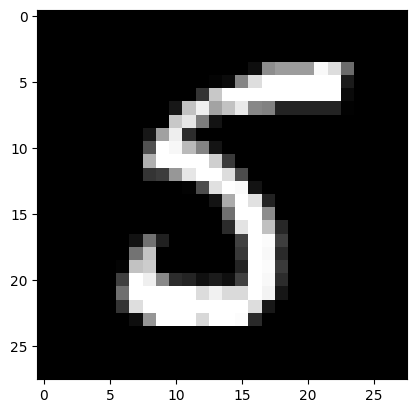

In [48]:
print(X_train.shape)
test_prediction(random.randint(1, 41000), W1, b1, W2, b2)